In [146]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.linear_model import LinearRegression

# This file is based off the articles on towards data science below
# Linear Regression: Moneyball — Part 1
# https://towardsdatascience.com/linear-regression-moneyball-part-1-b93b3b9f5b53
# Linear Regression: Moneyball — Part 2
# https://towardsdatascience.com/linear-regression-moneyball-part-2-175a9dc72e89

df = pd.read_csv('baseball.csv')

# Add run differential 
df['RD'] = (df["RS"] - df["RA"])

df.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415,46
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378,100
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403,7
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428,-72
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424,-146


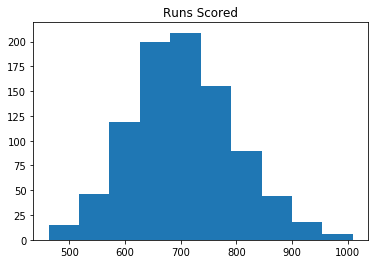

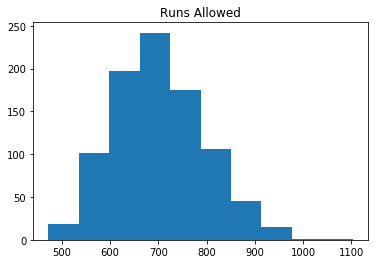

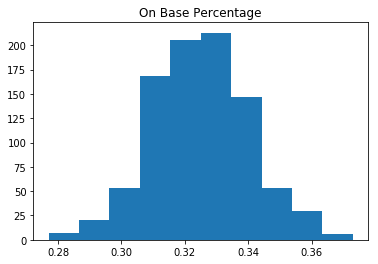

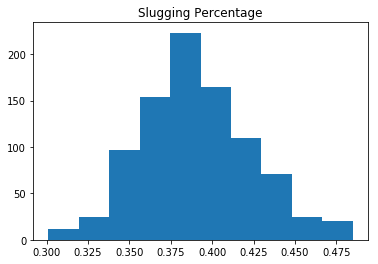

In [147]:
df = df[df['Year'] < 2002]

# Plottig historgrams of RS, RA, OBPS, SLG

plt.hist(df['RS'])
plt.title('Runs Scored')

plt.show()

plt.hist(df['RA'])
plt.title('Runs Allowed')

plt.show()


plt.hist(df['OBP'])
plt.title('On Base Percentage')

plt.show()

plt.hist(df['SLG'])
plt.title('Slugging Percentage')

plt.show()

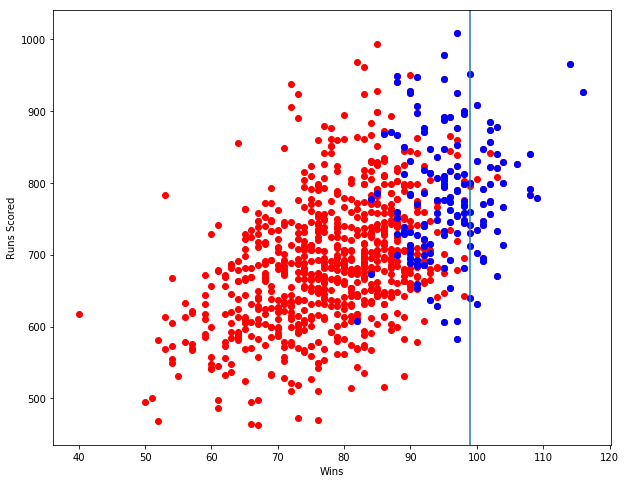

In [148]:
# Plotting DePodesta's argument that 99 wins are needed to go to the playoffs

# Create a dataframe to hold the teams that went to the playoffs
df1 = pd.DataFrame()
df1 = df[df['Playoffs']==True]

plt.figure(figsize=(10,8))
plt.scatter(x=df.W,y = df.RS, c="red")
plt.scatter(x=df1.W,y = df1.RS, c="blue")
plt.xlabel("Wins")
plt.ylabel("Runs Scored")
plt.axvline(x = 99)

# only 3 observations (red) who haven’t made it to the playoffs with ≥ 99 wins.

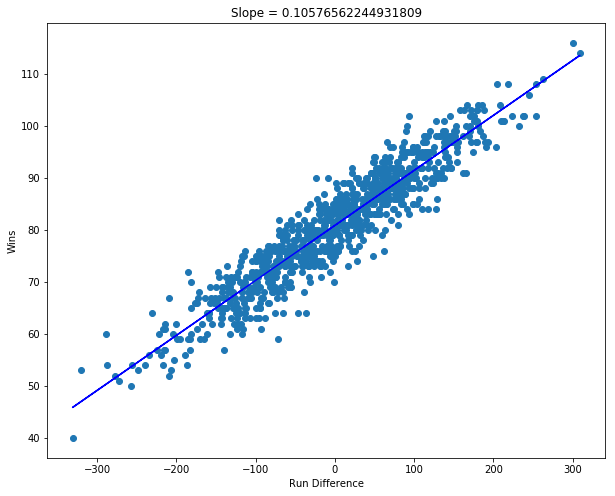

In [149]:
#DePodesta also calculated that the A’s need to score atleast 814 runs 
# and allow only 645 runs in order to make it to the postseason
# The A's would need a RD of 169

x = np.array(df.RD)
y = np.array(df.W)

# Derviing slope, intercept values 

slope, intercept = np.polyfit(x, y, 1)
abline_values = [slope * i + intercept for i in x]

# plotting the figure 

plt.figure(figsize=(10,8))
plt.scatter(x, y)
plt.plot(x, abline_values, 'b')
plt.title("Slope = %s" % (slope))
plt.xlabel("Run Difference")
plt.ylabel("Wins")
plt.show()

# Visulization of the relationshp between RD and Wins 
# The higher the RD, the greater amount of wins 

In [150]:
# Relationship between the two variables is linear
print(np.corrcoef(x,y))

# Correlation of 0.9385 between RD and number of wins.

[[1.         0.93851498]
 [0.93851498 1.        ]]


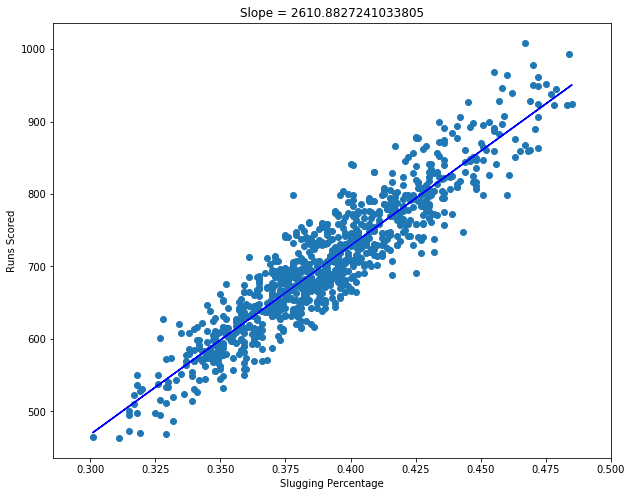

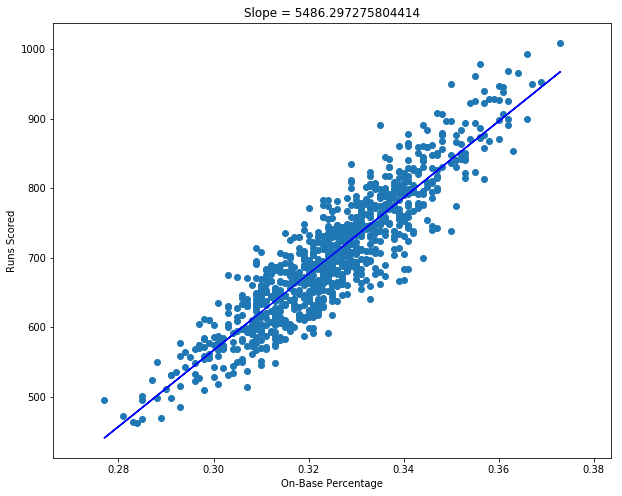

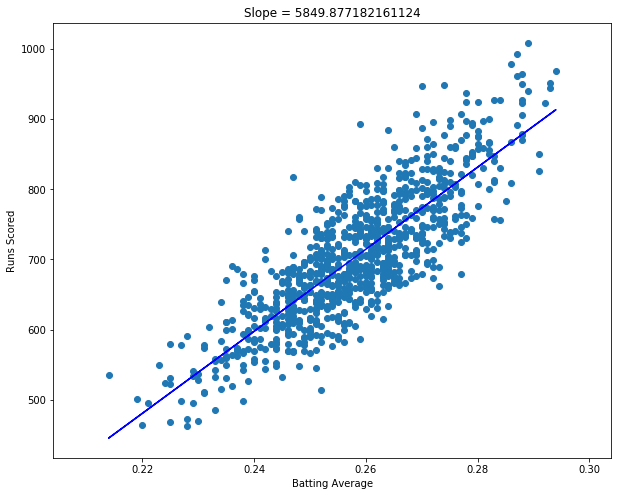

In [151]:
# Validating the assumption that SLG, AVG, and OBP is an indicator of the 
# amount of runs scored by a team 

y = np.array(df.RS)
x = np.array(df.SLG)

# Derviing slope, intercept values 

slope, intercept = np.polyfit(x, y, 1)
abline_values = [slope * i + intercept for i in x]

# plotting the figure 

plt.figure(figsize=(10,8))
plt.scatter(x, y)
plt.plot(x, abline_values, 'b')
plt.title("Slope = %s" % (slope))
plt.xlabel("Slugging Percentage")
plt.ylabel("Runs Scored")
plt.show()


y = np.array(df.RS)
x = np.array(df.OBP)

# Derviing slope, intercept values 

slope, intercept = np.polyfit(x, y, 1)
abline_values = [slope * i + intercept for i in x]

# plotting the figure 

plt.figure(figsize=(10,8))
plt.scatter(x, y)
plt.plot(x, abline_values, 'b')
plt.title("Slope = %s" % (slope))
plt.xlabel("On-Base Percentage")
plt.ylabel("Runs Scored")
plt.show()


y = np.array(df.RS)
x = np.array(df.BA)

# Derviing slope, intercept values 

slope, intercept = np.polyfit(x, y, 1)
abline_values = [slope * i + intercept for i in x]

# plotting the figure 

plt.figure(figsize=(10,8))
plt.scatter(x, y)
plt.plot(x, abline_values, 'b')
plt.title("Slope = %s" % (slope))
plt.xlabel("Batting Average")
plt.ylabel("Runs Scored")
plt.show()

In [152]:
# Clear linear relationship between eah of the variables and runs scored 

obp_relationship = np.corrcoef(df.OBP, df.RS)
slg_relationship = np.corrcoef(df.SLG, df.RS)
ba_relationship = np.corrcoef(df.BA, df.RS)

# As a rule of thumb, correlation above 0.7 is considered as strong positive correlation. 

print("Correlation between On-Base Percentage and runs scored. \n", obp_relationship)
print("Correlation between Slugging Percentage and runs scored. \n", slg_relationship)
print("Correlation between Batting Average and runs scored. \n", ba_relationship)

Correlation between On-Base Percentage and runs scored. 
 [[1.         0.90490915]
 [0.90490915 1.        ]]
Correlation between Slugging Percentage and runs scored. 
 [[1.         0.92638433]
 [0.92638433 1.        ]]
Correlation between Batting Average and runs scored. 
 [[1.         0.83162475]
 [0.83162475 1.        ]]


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 812, 812, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


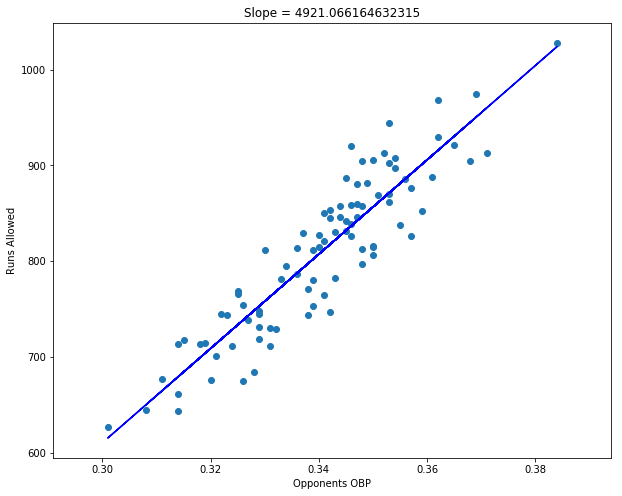

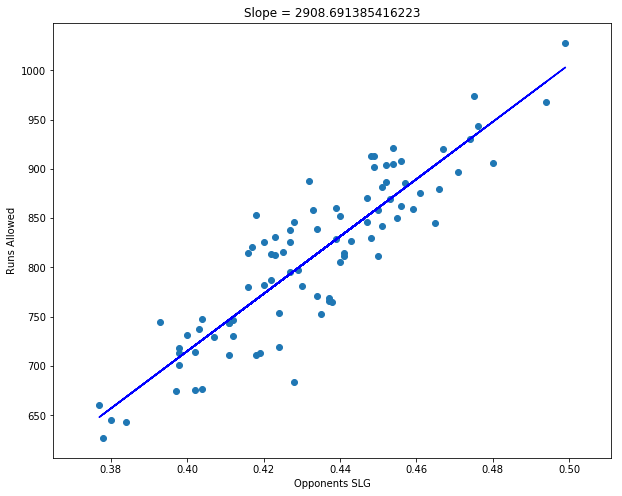

In [153]:
# validate the hypothesise that Opponents OBP and SLG have a similar relationship with Runs Allowed

# These columns have null values and if we dropna() we'll loose OOBP/OSLG data that we need
dfdrop = df.drop(['Playoffs', 'RankPlayoffs', 'RankSeason'], axis=1)

# validate that we only have null values for OOBP and OSLG
print(dfdrop.isnull().sum(axis=0).tolist())

dfdrop = dfdrop.dropna()

# validate that all nulls have been removed
print(dfdrop.isnull().sum(axis=0).tolist())

y = np.array(dfdrop.RA)
x = np.array(dfdrop.OOBP)

# Derviing slope, intercept values 

slope, intercept = np.polyfit(x, y, 1)
abline_values = [slope * i + intercept for i in x]

# plotting the figure 

plt.figure(figsize=(10,8))
plt.scatter(x, y)
plt.plot(x, abline_values, 'b')
plt.title("Slope = %s" % (slope))
plt.xlabel("Opponents OBP")
plt.ylabel("Runs Allowed")
plt.show()

new_df = []
y = np.array(dfdrop.RA)
x = np.array(dfdrop.OSLG)

# Derviing slope, intercept values 

slope, intercept = np.polyfit(x, y, 1)
abline_values = [slope * i + intercept for i in x]

# plotting the figure 

plt.figure(figsize=(10,8))
plt.scatter(x, y)
plt.plot(x, abline_values, 'b')
plt.title("Slope = %s" % (slope))
plt.xlabel("Opponents SLG")
plt.ylabel("Runs Allowed")
plt.show()

In [154]:
oobp_relationship = np.corrcoef(dfdrop.OOBP, dfdrop.RA)
oslg_relationship = np.corrcoef(dfdrop.OSLG, dfdrop.RA)

print("Correlation between Opponents Slugging Percentage and Runs Allowed. \n", oobp_relationship)
print("Correlation between Opponents Slugging and Runs Allowed. \n", oslg_relationship)


Correlation between Opponents Slugging Percentage and Runs Allowed. 
 [[1.         0.90990783]
 [0.90990783 1.        ]]
Correlation between Opponents Slugging and Runs Allowed. 
 [[1.         0.89511011]
 [0.89511011 1.        ]]


In [155]:
# Now that we validated the relationship between OOBP and OSLG with RA and BA, OBP and SLG with RS,
# we'll build a regression model in order to predict runs scored, runs allowed and wins.


# Our first model is used to predict ‘runs scored’.
# Our independent variables as on-base percentage, slugging percentage, batting average.

x = df[['OBP', 'SLG', 'BA']].values
y = df[['RS']].values

# Build the LR model object
RS_model = LinearRegression()

# Fitting the model with our variables
RS_model.fit(x,y)

# Printing model intercept and coefficients.
print(RS_model.intercept_)
print(RS_model.coef_)





[-788.45704708]
[[2917.42140821 1637.92766577 -368.96606009]]


In [157]:
# Our neagtive coefficient is BA 
# This situation represents a phenomenon known as multi-collinearity 
# which leads to discrepancies in multiple linear regression models.

# In order to avoid multi-collinearity, we must either add an interaction variable 
# or remove the variable causing the discrepancy

x = df[['OBP', 'SLG']].values

y = df[['RS']].values

# Build the LR model object
RS_model = LinearRegression()

# Fitting the model with our variables
RS_model.fit(x,y)

# Printing model intercept and coefficients.
print(RS_model.intercept_)
print(RS_model.coef_)

# Redefined model is:
# RS = -804.63+2737.77×(OBP)+1584.91×(SLG)

[-804.62706106]
[[2737.76802227 1584.90860546]]


In [158]:
# Extracting our variables from the dataframe.
x = dfdrop[['OOBP','OSLG']].values
y = dfdrop[['RA']].values

# Calling our model object.
RA_model = LinearRegression()

# Fitting the model.
RA_model.fit(x,y)

# Printing model intercept and coefficients.
print(RA_model.intercept_)
print(RA_model.coef_)

# Model for runs allowed:
# RA = -837.38 + 2913.60 ×(OOBP) + 1514.29 ×(OSLG)

[-837.37788861]
[[2913.59948582 1514.28595842]]


In [160]:
# Perdicting wins 

# Extracting our variables from the dataframe.
x = df[['RD']].values
y = df[['W']].values

# Calling our model object.
W_model = LinearRegression()

# Fitting the model.
W_model.fit(x,y)

# Printing model intercept and coefficients.
print(W_model.intercept_)
print(W_model.coef_)

#Model for wins:
# W = 80.88 + 0.11 ×(RD)

[80.88137472]
[[0.10576562]]


In [162]:
# Here are the Oakland Athletics statistics in 2001 before the playoffs.
# OBP: 0.339
# SLG: 0.430
# OOBP: 0.307
# OSLG: 0.373

# Prediction for runs scored.
print("Predication for RS: " RS_model.predict([[0.339,0.430]]))

# Predictions for runs allowed.
print("Predication for RA: ", RA_model.predict([[0.307,0.373]]))


[[804.98699884]]
[[621.92581602]]


In [163]:
# Thus, our models predicted the following:
# RS ≈ 805
# RA ≈ 622
# This implies that RD = 183.

# Prediction for wins 
print(W_model.predict([[183]]))

[[100.23648363]]


In [165]:
# Variable	De Podesta's estimates	Our Model	Actual
# RS	    814	                    805	        800
# RA	    645	                    622	        654
# W	        99	                    100	        103